<a href="https://colab.research.google.com/github/puraminy/mini_proj2/blob/master/Pollution_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load DATA


#### Data Main Source
#####https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

In [2]:
!git clone "https://github.com/puraminy/mini_proj2"

Cloning into 'mini_proj2'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 29 (delta 7), reused 9 (delta 1), pack-reused 0
Unpacking objects: 100% (29/29), done.


In [3]:
import numpy as np
import pandas as pd

dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv"

#github = "https://raw.githubusercontent.com/puraminy/mini_proj2/master/polution.csv"

github = "mini_proj2/polution.csv"

c=pd.read_csv(github)
data=np.asarray(c)
print(data)
np.shape(data)

[[0.12977867 0.35294122 0.24590163 ... 0.00229001 0.         0.        ]
 [0.14889336 0.36764708 0.24590163 ... 0.00381099 0.         0.        ]
 [0.15995975 0.42647061 0.22950819 ... 0.00533197 0.         0.        ]
 ...
 [0.01006036 0.2647059  0.26229507 ... 0.40558836 0.         0.        ]
 [0.01006036 0.2647059  0.26229507 ... 0.41399646 0.         0.        ]
 [0.00804829 0.2647059  0.24590163 ... 0.42086649 0.         0.        ]]


(43799, 8)

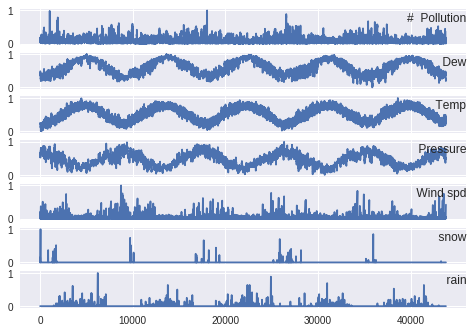

In [4]:
from matplotlib import pyplot
values = c.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(c.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

# Preparing Time Series

In [0]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
def create_data(n_hours = 24, n_train = 10000):
  dataset = read_csv('mini_proj2/polution.csv', header=0)
  values = dataset.values
  
  print(np.shape(values))
  # integer encode direction
  encoder = LabelEncoder()
  values[:,4] = encoder.fit_transform(values[:,4])
  # ensure all data is float
  values = values.astype('float32')
  # normalize features
  # scaler = MinMaxScaler(feature_range=(0, 1))
  scaled = values # scaler.fit_transform(values)
  # specify the number of lag hours
  # n_hours = 24
  n_features = 8 
  # frame as supervised learning
  reframed = series_to_supervised(scaled, n_hours, 1)

 # print(reframed[:2])
 # print(reframed.shape)

  # split into train and test sets
  values = reframed.values
   #365 * 24
  train = values[:n_train, :]
  test = values[n_train:, :]
  # split into input and outputs
  n_obs = n_hours * n_features
  train_X, train_y = train[:, :n_obs], train[:, -n_features]

  test_X, test_y = test[:, :n_obs], test[:, -n_features]
  print(train_X.shape, len(train_X), train_y.shape)
  # reshape input to be 3D [samples, timesteps, features]
    
  train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
  test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
  print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
  
  return train_X,train_y, test_X, test_y



# Split Train & Test Data

In [0]:
def create_data2(n_hours = 24, n_train = 10000, step =1):
  c=pd.read_csv(github)
  data=np.asarray(c)

  print(np.shape(data))
  
  print(data.shape[0])
  n_test = data.shape[0]-n_train
  train = data[:n_train, :]
  test = data[n_train:, :]


  train_X = np.zeros([n_train-n_hours, n_hours, 8])
  train_y = np.zeros([n_train-n_hours, 1])
  for i in range (n_train-n_hours):
      train_X[i,:,:] = train[i:i+n_hours,:]
      train_y[i] = train[i+n_hours,0]

  test_X = np.zeros([n_test-n_hours, n_hours, 8])
  test_y = np.zeros([n_test-n_hours, 1])
  for i in range (n_test-n_hours):
      test_X[i,:,:] = test[i:i+n_hours,:]
      test_y[i] = test[i+n_hours,0]

  print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
  
  return train_X,train_y, test_X, test_y



# Model

(43799, 8)
(10000, 192) 10000 (10000,)
(10000, 24, 8) (10000,) (33775, 24, 8) (33775,)
##################### Model model_normal_adam Hours 24 ##################


10000, 24, model_normal_adam, 8,adam,
33775/33775 [==============================] - 2s 66us/step
test loss [0.01887236168173774, 0.01887236168173774]
##################### Model model_lstm_adam Hours 24 ##################


Skipped
##################### Model model_lstm_rmsprop Hours 24 ##################


Skipped
##################### Model model_gru_adam Hours 24 ##################


Skipped
##################### Model model_gru_rmsprop Hours 24 ##################


Skipped
##################### Model model_rnn_adam Hours 24 ##################


Skipped
(43799, 8)
(10000, 384) 10000 (10000,)
(10000, 48, 8) (10000,) (33751, 48, 8) (33751,)
##################### Model model_normal_adam Hours 48 ##################


10000, 48, model_normal_adam, 8,adam,
33751/33751 [==============================] - 2s 69us/step
test loss [0

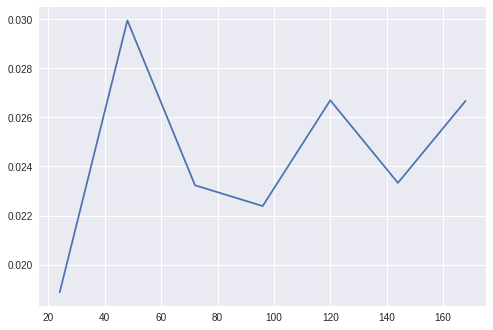

In [15]:
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU, SimpleRNN

import tensorflow as tf

def create_model(cell_type = "normal", optimizer = 'adam'):
  if cell_type == "lstm":
    model = Sequential()
    model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1, activation='linear'))
  elif cell_type == "gru":
    model = Sequential()
    model.add(GRU(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1, activation='linear'))
  elif cell_type == "rnn":
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1, activation='linear'))
  else:
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(10))
#     model.add(Dense(20)) 
    model.add(Dense(10)) 
    model.add(Dense(1, activation='linear'))
  
  model.name = 'model_' + cell_type + '_' + optimizer
  if optimizer == 'rmsprop':
    optimizer = tf.train.RMSPropOptimizer(0.001)
    
#   model.compile(loss='mae', optimizer=optimizer)
  
  model.compile(loss='mae',
              optimizer=optimizer,
              metrics=['mae'])

  return model

n_train = 10000
n_hours = 24
data_method = 1
silent = True
fname ='report3.csv'
file = open(fname,'w+')
file.write('n_train, n_hours, model, epochs, optimizer, loss\n')
file.close()
while n_hours <= 168:
  file = open(fname,'a+')
  # create data
  # create_data(0)
  # train_X1,train_y1, test_X1, test_y1 = create_data2(n_train)

  # print(train_X1[:1])
  # print("# ################ 24 hours #")
  if data_method ==2:
    train_X,train_y, test_X, test_y = create_data2(n_hours, n_train=n_train)
  else:
    train_X,train_y, test_X, test_y = create_data(n_hours, n_train=n_train)

  # print(train_X[:1])


  # create and run models
  optimizers  = ['adam','adam','rmsprop', 'adam','rmsprop', 'adam','rmsprop']
  
  model_normal = create_model(optimizer=optimizers[0])
  model_lstm_adam = create_model("lstm", optimizer=optimizers[1])
  model_lstm_rmsprop = create_model("lstm", optimizer=optimizers[2])
  model_gru_adam = create_model("gru", optimizer=optimizers[3])
  model_gru_rmsprop = create_model("gru", optimizer=optimizers[4])
  model_rnn_adam = create_model("rnn", optimizer=optimizers[5])
  model_rnn_rmsprop = create_model("rnn", optimizer=optimizers[6])
  
 
  models = [model_normal, 
            model_lstm_adam, 
            model_lstm_rmsprop,
            model_gru_adam,
            model_gru_rmsprop,
            model_rnn_adam]
  

  Run = [1, 0, 0, 0, 0, 0] # Specify which model you want to run
  EPOCHS =[8, 10, 8, 8, 8, 8]
  model_index = 0
  
  legends = []

  for model in models:

    # fit network
    model_name = model.name
    
    legends.append(model_name)
    print(f"##################### Model {model_name} Hours {n_hours} ##################")
    print("\n")

    if not Run[model_index]:
      print("Skipped")
      model_index+=1
      continue
      
    line = f"{n_train}, {n_hours}, {model_name}, {EPOCHS[model_index]},{optimizers[model_index]},"
    print(line)
    file.write(line)

    history = model.fit(train_X, train_y, 
                        epochs=EPOCHS[model_index], batch_size=72, 
  #                       validation_data=(test_X, test_y), 
                        validation_split=0.1,
                        verbose=0, shuffle=True)
    # plot history
    if not silent: 
      plt.figure(0)
      plt.plot(history.history['loss'], label='train')
      plt.xlabel("Num of Epochs")
      plt.ylabel("Loss")
      plt.title("Training")
      plt.legend(legends)

      plt.figure(1)
      plt.plot(history.history['val_loss'], label='test')
      plt.xlabel("Num of Epochs")
      plt.ylabel("Loss")
      plt.title("Test")
      plt.legend(legends)

    # make a prediction
  #   yhat = model.predict(test_X)
  # #   test_X_reshaped = test_X.reshape((test_X.shape[0], n_hours*n_features))

  #   #My code
  #   test_X_reshaped = test_X.reshape((test_X.shape[0], n_hours+1*n_features-1))

  #   # invert scaling for forecast
  #   inv_yhat = concatenate((yhat, test_X_resahped[:, -7:]), axis=1)
  #   # inv_yhat = scaler.inverse_transform(inv_yhat)
  #   inv_yhat = inv_yhat[:,0]
  #   # invert scaling for actual
  #   test_y_reshaped = test_y.reshape((len(test_y), 1))
  #   inv_y = concatenate((test_y_reshaped, test_X_reshaped[:, -7:]), axis=1)
  #   # inv_y = scaler.inverse_transform(inv_y)
  #   inv_y = inv_y[:,0]
  #   # calculate RMSE
  #   rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
  #   print('Test RMSE: %.3f' % rmse)
    test_predictions = model.predict(test_X).flatten()
    test_loss = model.evaluate(test_X, test_y)
    print(f"test loss {test_loss}")
    file.write(f"{test_loss[0]}\n")
    
    if not silent:
      plt.figure(num=model_index+2, figsize=(20, 3), dpi=80, facecolor='w', edgecolor='k')
      plt.title(f"Prediction of {model_name}")
      plt.xlabel('Time')
      plt.ylabel('normalized value')
      plt.legend(('Original', 'Predicted'), loc='upper right')
      plt.plot(data[:,0], 'bo')
      plt.plot(np.concatenate([data[:n_train,0],test_predictions]), 'go', alpha=0.4)
      plt.legend(('Original', 'Predicted'), loc='upper right')

    model_index +=1

  if not silent:
    plt.show()
  
  n_hours += 24
  file.close()

df = read_csv(fname)
values = df.values
# print(df)
plt.plot(values[:,1],values[:,5])

## Results 


|hours|Mean Absolute Error |  loss function 
|--|--|
|1  |  0.01328097059825935
|10 |   0.016554366017757748 
| 24 | 0.02725420025859075 
| 50|  0.023748632413918377
| 50 |    0.03477914220943476 | MSE
| 1 |  0.042994678616862125
| 1 |  0.016500973061146625
| 48| 0.02513334271283482 
|48| 0.01888059062355331
|72| 0.020766058881570845




In [8]:
|# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# import tensorflow as tf


# y_train = train_y
# x_train = train_X

# y_test = test_y
# x_test = test_X

# EPOCHS = 10

# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(120, activation=tf.nn.relu),
#     tf.keras.layers.Dense(18, activation=tf.nn.relu),
#     tf.keras.layers.Dense(1, activation='linear')
# ])

# optimizer = tf.train.RMSPropOptimizer(0.001)

# model.compile(loss='mse',
#               optimizer=optimizer,
#               metrics=['mae'])


# # Store training stats
# import matplotlib.pyplot as plt


# def plot_history(history):
#     plt.figure()
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error ')
#     plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
#              label='Train Loss')
#     plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
#              label='Val loss')
#     plt.legend()
#     #plt.ylim([0, 0.2])


# #model.summary()
# history = model.fit(x_train, y_train, epochs=EPOCHS,
#                 validation_split=0.1, verbose=1)

# model.summary()

# plot_history(history)
# test_predictions = model.predict(x_test).flatten()
# test_acc, test_loss = model.evaluate(x_test, y_test)
# print(f"test accuracy: {test_acc}, test loss {test_loss}")

SyntaxError: ignored

#Plot Predicted Values

In [0]:

# plt.figure(num=None, figsize=(20, 3), dpi=80, facecolor='w', edgecolor='k')
# plt.xlabel('Time')
# plt.ylabel('normalized value')
# plt.legend(('Original', 'Predicted'), loc='upper right')
# plt.plot(data[:,0], 'bo')
# plt.plot(np.concatenate([data[:n_train,0],test_predictions]), 'go')
# plt.legend(('Original', 'Predicted'), loc='upper right')
